In [1]:
%config IPCompleter.greedy=True


# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:
# tf.debugging.set_log_device_placement(True)  #show GPU use

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

**TRIPLE CHECK WHERE YOUR FILES ARE DOWNLOADED AND UNZIPPED. PLEASE REVIEW VIDEO BEFORE POSTING TO QA FORUMS.**

In [5]:
!pwd

/media/ys/hdd2/myproject/TF20COURSE/04-CNNs


In [6]:
!ls -d */ #list only directories

cell_images/  cifar-10-batches-py/


In [7]:
my_data_dir = '/media/ys/hdd2/myproject/TF20COURSE/04-CNNs/cell_images'

### os.listdir(path) : names of the entries in the directory given by path -> list 

In [8]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['train', 'test']

In [9]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path+'/parasitized')[0]

'C181P142ThinF_IMG_20151127_160650_cell_182.png'

In [13]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_img= imread(para_cell) #np array

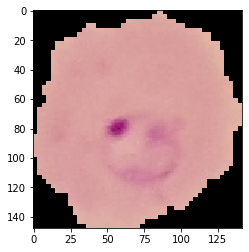

In [15]:
plt.imshow(para_img)

In [16]:
para_img.shape

(148, 142, 3)

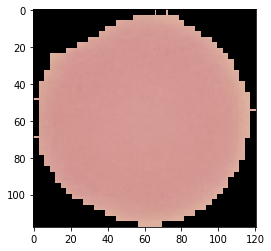

In [17]:
unifected_cell_path = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[0]
unifected_cell = imread(unifected_cell_path) #Read an image from a file into an array
plt.imshow(unifected_cell)

In [18]:
unifected_cell.shape #np array

(118, 121, 3)

**Let's check how many images there are.**

In [19]:
len(os.listdir(train_path+'/parasitized')) #number of pics in this dir

12480

In [20]:
len(os.listdir(train_path+'/uninfected'))

12480

**Let's find out the average dimensions of these images.**

In [21]:
unifected_cell.shape #uninfected

(118, 121, 3)

In [22]:
para_img.shape #infected

(148, 142, 3)

In [23]:
#test test_path with uninfected cell[0]
test_uninfected_cell_path = test_path+'/uninfected/'+os.listdir(test_path+'/uninfected')[0]
test_uninfected_cell_path

'/media/ys/hdd2/myproject/TF20COURSE/04-CNNs/cell_images/test//uninfected/C187P148NThinF_IMG_20151203_153410_cell_86.png'

(118, 109, 3)


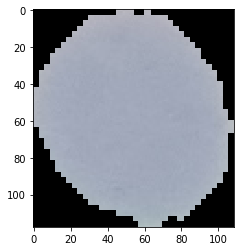

In [24]:
test_uninfected_cell = imread(test_uninfected_cell_path)
print(test_uninfected_cell.shape)
plt.imshow(test_uninfected_cell)

(133, 139, 3)


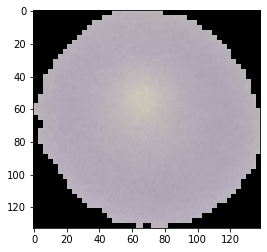

In [25]:
#test test_path with uninfected cell[1]
test_uninfected_cell_path1 = test_path+'/uninfected/'+os.listdir(test_path+'/uninfected')[1]
test_uninfected_cell1 = imread(test_uninfected_cell_path1)
print(test_uninfected_cell1.shape)
plt.imshow(test_uninfected_cell1)

In [26]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
#names of the entries in the directory given by path -> list
for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

####  sns.jointplot(dim1,dim2) : Draw a plot of two variables with bivariate and univariate graphs.

In [27]:
#test sns.jointpllt(a,b)
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
#Load a dataset from the online repository (requires internet).
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


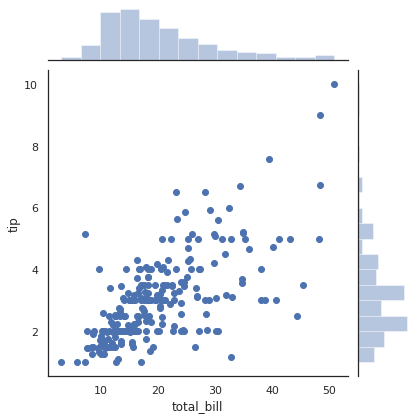

In [28]:
#test
g = sns.jointplot(x="total_bill", y="tip", data=tips)

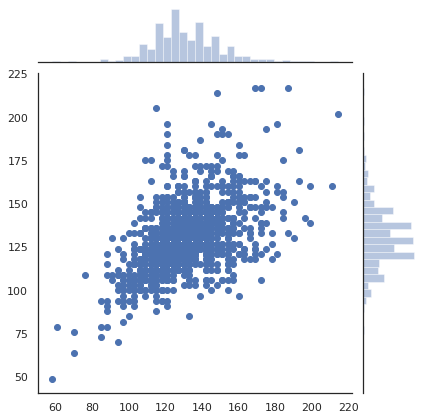

In [29]:
sns.jointplot(dim1,dim2) #dim1 =[118, 133,...,139], dim2=[109,139,...,148]

In [30]:
last_cell_path = test_path+'/uninfected/'+os.listdir(test_path+'/uninfected')[-1]
last_cell_path

'/media/ys/hdd2/myproject/TF20COURSE/04-CNNs/cell_images/test//uninfected/C39P4thinF_original_IMG_20150622_110435_cell_28.png'

In [31]:
last_cell = imread(last_cell_path)
last_cell.shape

(139, 148, 3)

In [32]:
np.mean(dim1)

130.92538461538462

In [33]:
np.mean(dim2)

130.75

In [34]:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!
[ImageDataGenerator](https://keras.io/preprocessing/image/)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [37]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

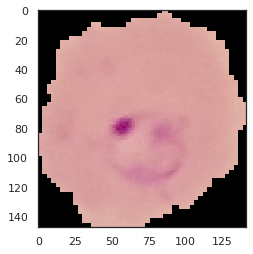

In [38]:
plt.imshow(para_img) #train_path+'/parasitized'+...[0]

### ImageDataGenerator methods
#### image_gen.random_transform(para_img)
```
random_transform(x, seed=None)
Applies a random transformation to an image.

Arguments

x: 3D tensor, single image.
seed: Random seed.
Returns

A randomly transformed version of the input (same shape).```

#### image_gen.flow_from_directory(train_path)
Takes the path to a directory & generates batches of augmented data.

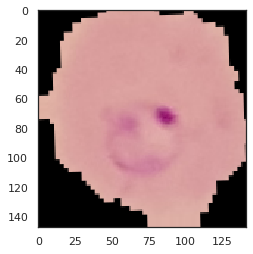

In [39]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [40]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [41]:
print( len(os.listdir(train_path+'/parasitized')) )
os.listdir(train_path+'/parasitized')[:5]

12480


['C181P142ThinF_IMG_20151127_160650_cell_182.png',
 'C167P128ReThinF_IMG_20151201_110011_cell_233.png',
 'C82P43ThinF_IMG_20150817_123824_cell_196.png',
 'C80P41ThinF_IMG_20150817_111802_cell_1.png',
 'C189P150ThinF_IMG_20151203_141809_cell_86.png']

In [42]:
print( len(os.listdir(train_path+'/uninfected')) )
os.listdir(train_path+'uninfected')[:5]

12480


['C108P69ThinF_IMG_20150924_225511_cell_135.png',
 'C239ThinF_IMG_20151127_113253_cell_67.png',
 'C142P103ThinF_IMG_20151005_223257_cell_174.png',
 'C173P134NThinF_IMG_20151130_120046_cell_53.png',
 'C188P149ThinF_IMG_20151203_134449_cell_85.png']

In [43]:
# Takes the path to a directory & generates batches of augmented data.
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [44]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Channel, Filter, Kernel 
###  Channel : In practicality, most input images have 3 channels(RGB), and that number only increases the deeper you go into a network. It’s pretty easy to think of channels, in general, as being a “view” of the image as a whole, emphasising some aspects, de-emphasising others.[(Reference : Irhum Shafkat)](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
![channel1](channel1.jpeg)
* Most of the time, we deal with RGB images with three channels. [ (Photo by Andre Mouton) ](https://unsplash.com/photos/_d3sppFprWI) 

###  A filter: A collection of kernels, in case of multiple channels
![channel](channel.png)
*  whereas in the 1 channel case, where the term filter and kernel are interchangeable,

##  Each filter in a convolution layer produces one and only one output channel.
1. Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).
![output1](output1.gif)

2. Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.
![output2](output2.gif)

3.  Finally, then there’s the bias term. The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.
![output3](output3.gif)

## 2D(7x7) input matrix with 3 channels (RGB) - each filter consists of 3 kernels( A filter is a collection of 3 kernels)

### * Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique.
#### * Whereas in the 1 channel case, where the term filter and kernel are interchangeable.
![filter](filter.png)

### In case of CNN layer
[cnn basic Irhum Shafkat](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
* <span style="color:red"> **kernel**</span>, __*(3,3) matrix of weights*__ with only <span style="color:red">9 parameters</span> for CNN
```
[[0,1,2],
 [2,2,0],
 [0,1,2]]      
```
“slides” over the __*2D input data(5,5 matrix)*__,``With stride =1 and valid padding(no padding)``, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. __*Output (3,3) matrix*__.

* Convolutions allow us to do this transformation with only 9 parameters, with each output feature, instead of “looking at” every input feature, only getting to “look” at input features coming from roughly the same location. 

![kernel_slide](kernel_slide.gif)
* The kernel repeats this process for every location it slides over, converting a 2D matrix of features into yet another 2D matrix of features. 
* The output features are essentially, the weighted sums (with the weights being the values of the kernel itself) of the input features located roughly in the same location of the output pixel on the input layer.

###  In case of standard fully connected layer
* 5×5=25 input features, weight matrix 25x9= 225 ,which is kernel in cnn layer, and 3×3=9 output features
* We need weight matrix of 25×9 = <span style="color:red">225 parameters</span>, with every output feature being the weighted sum of every single input feature.

[Following contents are from the cnn artilce written by Sumit Saha
](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


# Convolution Layer — The Kernel
###  The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.
### The Kernel shifts 9 times- convolution with same padding , zero padding with stride =1
![Image_convlovedFeature](kernel.gif)

Kernel/Filter, K = 
```
1  0  1
0  1  0
1  0  1
```
* Convoluting a 5x5x1 image with a 3x3x1 kernel to get a 3x3x1 convolved feature
* Image Dimensions = 5 (Height) x 5 (Breadth) x <span style="color:blue">1 (Number of channels, eg. RGB)</span>
In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.
* The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

# first instance of 'input_img * feature_k = convolved_feature'
import numpy as np
input_img = np.array(
[[1, 1, 1],
 [0, 1, 1],
 [0, 0 ,1]]
)
feature_k = np.array(
[[1, 0, 1],
 [0, 1, 0],
 [1, 0, 1]]
)
sum(sum(input_img*feature_k)) #4

![cnn operation](cnnop.gif)
* Convolution operation on a MxNx3 image matrix with a 3x3x3(width, height, channel-depth) Kernel/Filter, K,
* In the case of images with <span style="color:blue">multiple channels (e.g. RGB)</span>, the Kernel has the same depth(3) as that of the input image. Matrix Multiplication is performed between Kn(Kernel) and In(Input) stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

### The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. 
* ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. 
* With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would

[cnn padding very useful](https://deeplizard.com/learn/video/qSTv_m-KFk0)

# Padding :  
## Pad the edges with extra, “fake” pixels (usually of value 0, hence the oft-used term “zero padding”)
## The kernel when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels beyond the edge, producing an output the same size as the input.
### 1. In case of without padding :  ( valid padding)- default in Conv2D

* Case1: Input(n,n): (6,6), Filter(f,f): (3,3), stride 1 => 4 by 4 matrix: (n-f+1) x (n-f+1)
![padding1](padding1.png) 
* So if you take this gray scale image.<span style="color:green">The pixel in the corner</span> will only get covers one time.(The pixels on the edge are never at the center of the kernel) but if you take <span style="color:red">the middle pixel</span> it will get covered more than once basically what does that means is we have more info on that middle pixel so these are the two main downsides([Article](https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7))
    * Shrinking outputs(If we start out with a 4 x 4 image, for example, then just after a convolutional layer or two, the resulting output may become almost meaningless with how small it becomes.)
    * Loosing information on corners of the image( the information around the edges of the input.)


* Case2: Input(n,n): (4,4), Filter(f,f): (3,3), stride 1 => 2 by 2 matrix: (n-f+1) x (n-f+1)
![padding1](padding1_1.png)
### To overcome this problem, we can introduce Padding to an image. (ex. same padding with zero padding)
#### With each convolutional layer, just as we define how many filters to have and the size of the filters, we can also specify whether or not to use padding.


###  2. Same padding with zero padding
* It’s an additional layer(zero-padding: symmetrically adding zeroes to the input matrix) that we can add to the border of an image.For an example see the figure below there one more layer added to the ``4*4 image`` and now it has converted in to ``6*6 image``(If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0. Also stride = 1)
![padding2](padding2_1.png)
### zero-padding
    * zero-padding is a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.
* So now there is more frame that covers the edge pixels of an image
* The kernel(Filter,matrix of weights) when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels(value 0) beyond the edge, producing an output the same size as the input.

### padding test
* x: input image of shape [2, 3], 1 channel
* valid_pad: max pool with 2x2 kernel, stride 2 and VALID padding.
* same_pad: max pool with 2x2 kernel, stride 2 and SAME padding (this is the classic way to go)

#### The output shapes are:
* valid_pad: here, no padding so the output shape is [1, 1]
* same_pad: here, we pad the image to the shape [2, 4] (with -inf and then apply max pool), so the output shape is [1, 2]

# Padding: same(padding) vs. valid(no padding)
* When stride is 1 (more typical with convolution than pooling), we can think of the following distinction:

* "SAME": output size is the same as input size. This requires the filter window to slip outside input map, hence the need to pad.
* "VALID": Filter window stays at valid position inside input map, so output size shrinks by filter_size - 1. No padding occurs.

## 1. Same padding (with zero padding)
### 1)  Same Padding:   the dimensionality is either increased or remains the same through covolution operation
* When we augment the 5x5x1 image into a 7x7x1 image with <span style="color:red">0(zero) added ouside</span> and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. <span style="color:red">striding = 1</span>
![same padding](samepadding.gif)

### 2)  Striding = 2  :  convolved feature is reduced in dimensionality, enen though same padding
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the same padding, output matrix dimensions is decreased to (3x3x1). <span style="color:red">striding = 2</span>

![valid padding](validpadding.gif)

## 2. Valid paddding( no padding) - default in Conv2D
### Valid Padding(no padding) :  convolved feature is reduced in dimensionality as compared to the input through covolution operation
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension same as the Kernel (3x3x1) itself. <span style="color:red">striding = 1</span>

* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the valid padding(no padding), we are presented matrix with a reduced dimension (2x2x1). <span style="color:red">striding = 2</span>



![pad stride](padstride.png)

# Pooling Layer : Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature.
*  This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant(preserve same identity, category (etc) even if ratated or position changed), thus maintaining the process of effectively training of the model.
![pooling](pooling.gif)
* Max pooling : 3x3 pooling over 5x5 convolved feature

* Max Pooling : performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. 
* Average Pooling : simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.
![pooling](pooling.jpeg)

* The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. 

*  Often when running a convolution layer, you want an output with a lower size than the input. This is commonplace in convolutional neural networks, where the size of the spatial dimensions are reduced when increasing the number of channels. -> 
    * striding = 2(downsizing by roughly a factor of 2), 3(downsizing roughly by factor 3) and so on. 
    * pooling(ex. max pooling)

[kernel feature size guide ](https://www.sicara.ai/blog/2019-10-31-convolutional-layer-convolution-kernel)

# Creating the Model

### Valid paddding( no padding) - default in Conv2D
* Valid Padding(no padding) : convolved feature is reduced in dimensionality as compared to the input through covolution operation¶
* As for 130x130x3 input image if we perform with kernel(3x3) and 32 filters(3x3x3), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension (128, 128, 32) <- 130 - 3 + 1 = 128. striding = 1

### 2D(130x130) input matrix with 3 channels(RGB) -  filter is the collection of kernels
#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(130, 130, 3), padding='valid', activation='relu',)
* Input volume (130x130x3) x[:,:,0],x[:,:,1],x[:,:,2]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(130x130x3)-w0[:,:,0],w0[:,:,1],w0[:,:,2] , Bias b0(1x1x1)-,b0[:,:,0]
    * Filter w1(130x130x3)-w1[:,:,0],w1[:,:,1],w1[:,:,2] , Bias b1(1x1x1)-,b1[:,:,0]
    * Filter w2(130x130x3)-w2[:,:,0],w2[:,:,1],w2[:,:,2] , Bias b2(1x1x1)-,b2[:,:,0]
    * ....
    * Filter w129(130x130x3)-w129[:,:,0],w129[:,:,1],w129[:,:,2] , Bias b129(1x1x1)-,b129[:,:,0],b129[:,:,1],b129[:,:,2]
* kernel(3,3) matrix of weights with only 9 parameters for CNN slides over the 2D input data(130,130 matrix)
with stride =1 and valid padding(no padding).
    * 130 - 3 + 1 (Input shape(130x130x3), Filter shape(3x3) with 32 filters, Output shape(128x128x32))
    * **output shape -> (,128,128,32)**
    
#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (128,128) -> 128/2 => 64
* **output shape -> (,64,64,32)**

#### Conv2D(filters=64, kernel_size=(3,3),input_shape=(64, 64, 32), activation='relu',)
* Input (,64,64,32), kernel(3,3) with 64 filters, valid padding(no padding), stride=1
* 64-3+1 -> 62 
* **output shape -> (,62,62,64)**

#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (62,62) -> 62/2 => 31
* **output shape -> (,31,31,64)**

#### Conv2D(filters=64, kernel_size=(3,3),input_shape=(31, 31, 64), activation='relu',)
* Input (,31,31,64), kernel(3,3) with 64 filters, valid padding(no padding), stride=1
* 31-3+1 -> 29 
* **output shape -> (,29,29,64)**

#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (29,29) -> 29//2 =>14
* **output shape -> (,14,14,64)**

#### Flatten()
* 14x14x64 -> **output(,12544)**

#### Dense(128, activation='relu')
* 128 neurons hidden layer -> **output (,128)**

#### Dense(1, activation='sigmoid')
* classifier with binary classes -> **output (,1)**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [47]:
#not using : strategy = tf.distribute.MirroredStrategy
#not using : with strategy.scope():
    
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Early Stopping

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [52]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [53]:
batch_size = 16

In [54]:
#Takes the path to a directory & generates batches of augmented data.
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2], #(130,130)
                                                color_mode='rgb',
                                               batch_size=batch_size, #16
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [55]:
image_shape[:2] #image_shape = (130,130,3)

(130, 130)

In [56]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2], #image_shape = (130,130,3)-> (130,130)
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [57]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# # Let's define a speed_test decorator
# from functools import wraps
# from time import time

# def speed_test(fn):
# 	@wraps(fn)
# 	def wrapper(*args, **kwargs):
# 		start_time = time()
# 		result = fn(*args, **kwargs)
# 		end_time = time()
# 		print(f"Executing {fn.__name__}")
# 		print(f"Time Elapsed: {end_time - start_time}")
# 		return result
# 	return wrapper

# @speed_test
# def model_fit1():
#     results = model.fit_generator(train_image_gen,epochs=20,
#                               validation_data=test_image_gen,
#                              callbacks=[early_stop])
#     return results

# print(model_fit1())

In [61]:
#Trains the model on data generated batch-by-batch by a Python generator 
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 121s 78ms/step - loss: 0.5267 - accuracy: 0.7384 - val_loss: 0.3433 - val_accuracy: 0.9065
Epoch 2/20
1560/1560 [==============================] - 121s 77ms/step - loss: 0.2518 - accuracy: 0.9285 - val_loss: 0.2026 - val_accuracy: 0.9435
Epoch 3/20
1560/1560 [==============================] - 121s 77ms/step - loss: 0.1821 - accuracy: 0.9454 - val_loss: 0.1834 - val_accuracy: 0.9385
Epoch 4/20
1560/1560 [==============================] - 119s 76ms/step - loss: 0.1686 - accuracy: 0.9478 - val_loss: 0.1615 - val_accuracy: 0.9473
Epoch 5/20
1560/1560 [==============================] - 120s 77ms/step - loss: 0.1626 - accuracy: 0.9486 - val_loss: 0.1586 - val_accuracy: 0.9446
Epoch 6/20
1560/1560 [==============================] - 118s 76ms/step - loss: 0.1559 - accuracy: 0.9509 - val_loss: 0.1618 - val_accuracy: 0.9469
Epoch 7/20
1560/1560 [==============================] - 120s 77ms/step - loss: 0.1579 - accuracy: 0.9494 - val_loss: 0

In [62]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

# Evaluating the Model

In [63]:
losses = pd.DataFrame(model.history.history)

### Don't excute this line : result from previous code.

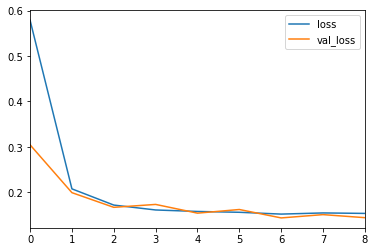

In [49]:
#Don't excute this line : result from previous code.
losses[['loss','val_loss']].plot()

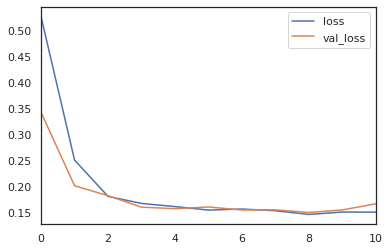

In [64]:
#result with updated code
losses[['loss','val_loss']].plot()

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
#Evaluates the model on a data generator.
model.evaluate_generator(test_image_gen)

[0.1587522617438408, 0.9492308]

In [67]:
from tensorflow.keras.preprocessing import image

In [68]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [69]:
pred_probabilities

array([[1.3932586e-04],
       [6.9260597e-05],
       [1.8239021e-05],
       ...,
       [9.6664143e-01],
       [9.8657262e-01],
       [9.7549093e-01]], dtype=float32)

In [70]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [71]:
predictions = pred_probabilities > 0.5

In [72]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

![pr1](pr1.png)

![pr2](pr2.png)
![pr3](pr3.png)

* confusion matrix

|    |    |Actual Positives |Actual Negatives |
|:---|:---|:------|:------|
|    |    |cat    |dog    |
|Predicted Positives|Cat|	5(TP)|	2(FP)|
|Predicted Negatives|Dog|	3(FN)|	3(TN)|

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [75]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1220,   80],
       [  60, 1240]])

# Predicting on an Image

In [95]:
# Your file path will be different!
para_cell

'/media/ys/hdd2/myproject/TF20COURSE/04-CNNs/cell_images/train//parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [96]:
my_image = image.load_img(para_cell,target_size=image_shape) #(130,130,3)

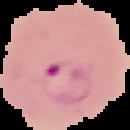

In [97]:
my_image

In [98]:
type(my_image)

PIL.Image.Image

In [99]:
my_image = image.img_to_array(my_image)

In [100]:
type(my_image)

numpy.ndarray

In [101]:
my_image.shape

(130, 130, 3)

In [102]:
#test np.expand_dims
x = np.array([1,2])
print(x.shape)
x #1-d

(2,)


array([1, 2])

In [103]:
#test
y = np.expand_dims(x, axis=0) #1 is inserted at axis position,0 : (2,) -> (1,2)
print(y.shape)
y #2-d

(1, 2)


array([[1, 2]])

In [104]:
y_axis_1 = np.expand_dims(x, axis=1) #1 is inserted at axis position,1 : (2,) -> (2,1)
print(y_axis_1.shape)
y_axis_1 #2-d

(2, 1)


array([[1],
       [2]])

In [105]:
# Expand the shape of an array.
# Insert a new axis that will appear at the axis position in the expanded array shape.

my_image = np.expand_dims(my_image, axis=0)  #1 is inserted at axis position,0 : (130,130,3) -> (1,130,130,3)

In [106]:
my_image.shape

(1, 130, 130, 3)

In [107]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [108]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [109]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# Great Job!